<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/ht2_21000887.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoja de Trabajo 2

Jairo O. Salazar 

Carnet: 21000887

**Problema 1**


Desarrolle una funcion que permita hacer la binarizacion de una imagen, para realizarlo puede utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los valores 0 (negro) y 255 (blanco).

In [12]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow  
from mpl_toolkits.mplot3d import Axes3D

from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [3]:
def write_and_show (strImg,arrImg):
  cv2.imwrite(strImg,arrImg)
  imgTemp = cv2.imread(strImg)
  imgTemp = cv2.cvtColor(imgTemp,cv2.COLOR_BGR2RGB)
  plt.imshow(imgTemp)

def binarizacion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    h, w = gray.shape[:2]
    m = np.reshape(gray, [1, w*h])

    mean = m.sum() / (w*h)
    
    ret, binary = cv2.threshold(gray, mean, 255, cv2.THRESH_BINARY)

    write_and_show('binary.jpg',binary)



def CargarImagen(nombre):
  imgoriginal = cv2.imread(nombre) 
  imgoriginal = cv2.cvtColor(imgoriginal,cv2.COLOR_BGR2RGB)
  plt.imshow(imgoriginal)    
  return imgoriginal



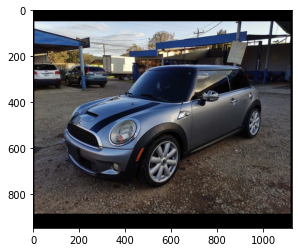

In [6]:
img = CargarImagen('mini.jpg')

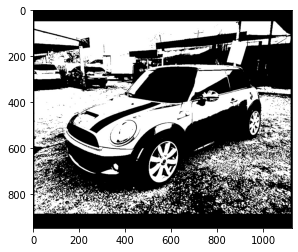

In [49]:

binarizacion(img)

# Problema 2

Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imagenes recuerde que para realizar las operaciones logicas es necesario que la imagen este binarizada. Para realizar las operaciones aritmeticas se recomienda seleccionar imagenes que lo permitan y que sea facil revisar el resultado.

In [46]:
def write_and_show (strImg,arrImg):
  cv2.imwrite(strImg,arrImg)
  imgTemp = cv2.imread(strImg)
  imgTemp = cv2.cvtColor(imgTemp,cv2.COLOR_BGR2RGB)
  plt.imshow(imgTemp)

250 500


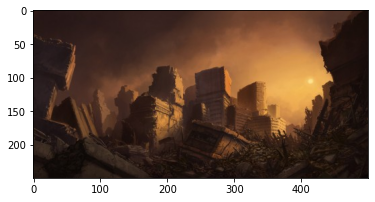

In [39]:
imagen1 = CargarImagen('im1.jpeg')
print(imagen1.shape[0],imagen1.shape[1])

250 500


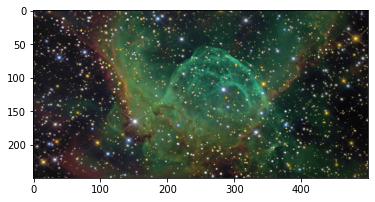

In [40]:
imagen2 = CargarImagen('im2.jpeg')
print(imagen2.shape[0],imagen2.shape[1])

**Suma de imagenes**

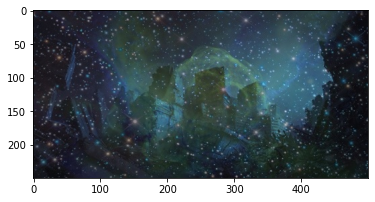

In [51]:
def SumaImagenes(img1,img2):
  sumAw = cv2.addWeighted(img1,0.5,img2,0.5,0)
  write_and_show('imagenadd.jpg',sumAw)

SumaImagenes(imagen1,imagen2)
  

**Resta de Imagenes**

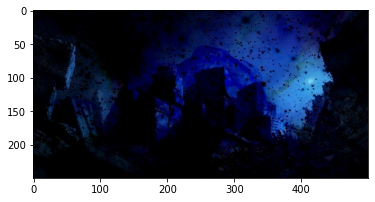

In [53]:
def RestaImagenes(img1,img2):
  restAw = cv2.subtract(img1,img2)
  write_and_show('imagensub.jpg',restAw)

RestaImagenes(imagen1,imagen2)

**Operacion AND,OR,XOR**

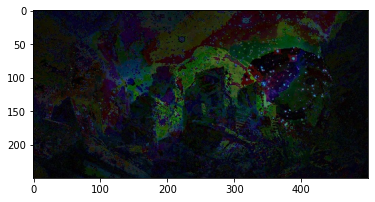

In [84]:
def AndImg (img1,img2):
  imgAnd = cv2.bitwise_and(img1,img2)
  write_and_show('imgand.jpg',imgAnd)

def OrImg(img1,img2):
  imgAnd = cv2.bitwise_or(img1,img2)
  #print(imgOr.shape[0],imgOr.shape[1])
  write_and_show('imgand.jpg',imgAnd)

def Xorimg(img1,img2):
  imgxor = cv2.bitwise_xor(img1,img2)
  write_and_show('imgxor.jpg',imgxor)

AndImg(imagen1,imagen2)

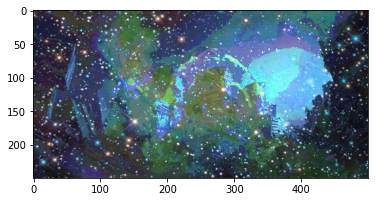

In [83]:
OrImg(imagen1,imagen2)

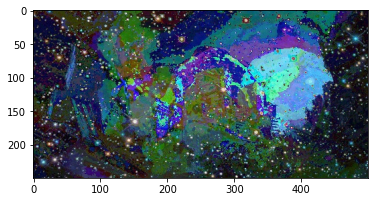

In [85]:
Xorimg(imagen1,imagen2)

# Problema 3

Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

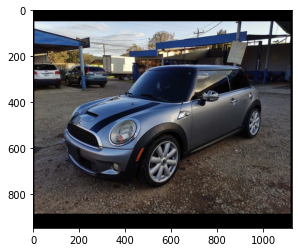

In [15]:
img = CargarImagen('mini.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

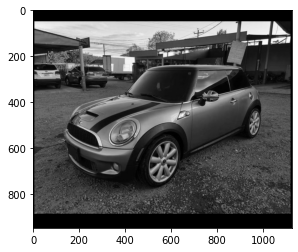

In [16]:
write_and_show('gray.jpg',gray)

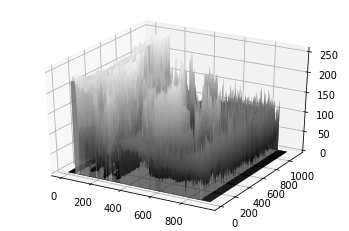

In [17]:
xx, yy = np.mgrid[0:gray.shape[0], 0:gray.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, gray ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=0)

# show it
plt.show()

# Problema 4


Implemente una funcion para cada una de las trasformaciones vistas en clase: negativa, lineal, logar ́ıtmica y exponencial. Puede utilizar la misma funci ́on configurable por medio de parametros, por ejemplo, si se ingresa 1 en el para ́metro de selecci ́on se debera realizar una transformaci ́on lineal, si se ingresa 2 se deber ́a realizar una transformacion logaritmica y ası sucesivamente.

In [10]:
def Transformaciones (tipo,img):
  if (tipo == 'LOG'):
    output = 98 * np.log(1.0 + img)
    output = np.uint8(output + 0.5)
   
  elif (tipo == 'EXP'):
    c = 255 / np.log(1 + np.max(img)) 
    output = c * (np.log(img + 1)) 
    output = np.array(output, dtype = np.uint8)  
  elif (tipo == 'NEG'):
    output = 1 - img 

  
 
  write_and_show('Trans.jpg',output)

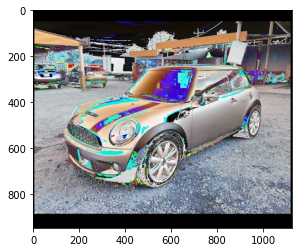

In [8]:
img = CargarImagen('mini.jpg')
Transformaciones('LOG',img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


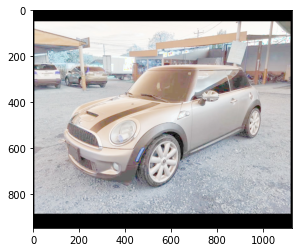

In [9]:
Transformaciones('EXP',img)

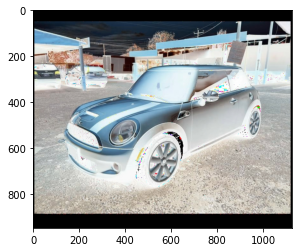

In [11]:
Transformaciones('NEG',img)

# Problema 5

Desarrolle una funcion que dada una imagen a color y kernel de cualquier dimension (3X3, 5X5, 7X7, 9X9) y de cualquier tipo (Gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convolucion a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

In [18]:
def convolutional_filter(imagen, kernel):
  alto = imagen.shape[0]
  ancho =  imagen.shape[1]
  altoKernel = len(kernel[:,0])
  anchoKernel = len(kernel[0,:])
  step = int(len(kernel[0,:])/2)
  newImg = np.zeros((alto, ancho, 1))
  for i in range(step, alto - step):
    newPixel = 0
    for j in range(step, ancho - step):
      ventana = imagen[i-step:i+2*step, j-step:j+2*step]
      newPixel = 0
      for m in range(0, altoKernel):
        for n in range(0, anchoKernel):
          newPixel = newPixel + ventana[m, n] * kernel[m, n]
          newImg[i, j] = int(newPixel)
  return newImg 

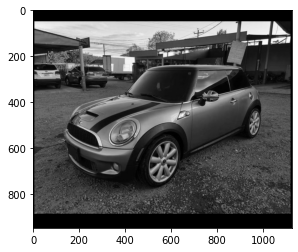

In [23]:
img = CargarImagen('mini.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
write_and_show('gris.jpg',gray)

In [24]:
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
imgcf = convolutional_filter(gray,largeBlur)
write_and_show(imgcf)

KeyboardInterrupt: ignored